In [49]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA

In [4]:
credit_cards=pd.read_csv("C:/Users/user/Downloads/Data/Credit Card_Clustering/Credit Card_Clustering.csv")

In [5]:
rows,columns=credit_cards.shape

print("The Data Frame Rows",rows)
print("The Data Frame Rows",columns)

The Data Frame Rows 8950
The Data Frame Rows 18


In [6]:
#look at the first five value in dataframe 
credit_cards.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
credit_cards[credit_cards["ONEOFF_PURCHASES"] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [20]:
#look at the dataframe in null values

credit_cards.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
credit_cards["CREDIT_LIMIT"]=credit_cards["CREDIT_LIMIT"].fillna(credit_cards["CREDIT_LIMIT"].median())
credit_cards["MINIMUM_PAYMENTS"]=credit_cards["MINIMUM_PAYMENTS"].fillna(credit_cards["MINIMUM_PAYMENTS"].median())

In [13]:
credit_cards

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
# drop the row missing value ,if u use dropna() :
credit_cards=credit_cards.dropna()

In [14]:
credit_cards.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
credit_cards.duplicated().sum()

np.int64(0)

In [18]:
credit_cards.drop("CUST_ID", axis = 1, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_1348\2161380586.py:7: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


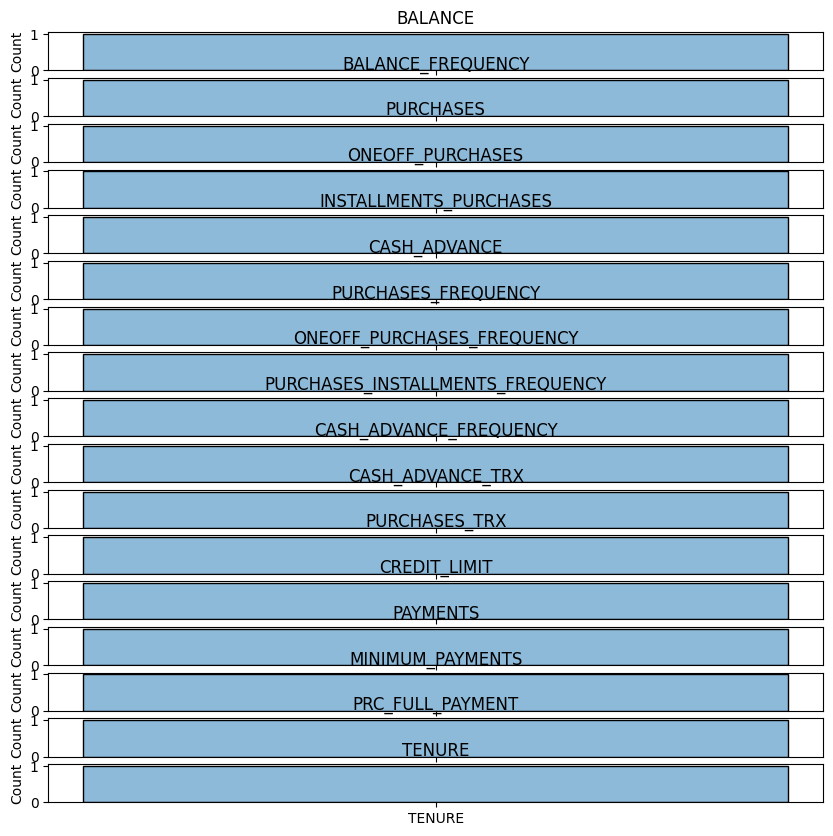

In [22]:
plt.figure(figsize=(10,10))
for i in range(len(credit_cards.columns)):
  plt.subplot(17, 1, i+1)
  sns.histplot(data=[credit_cards.columns[i]], kde=True)
  plt.title(credit_cards.columns[i])

plt.tight_layout()

<Axes: >

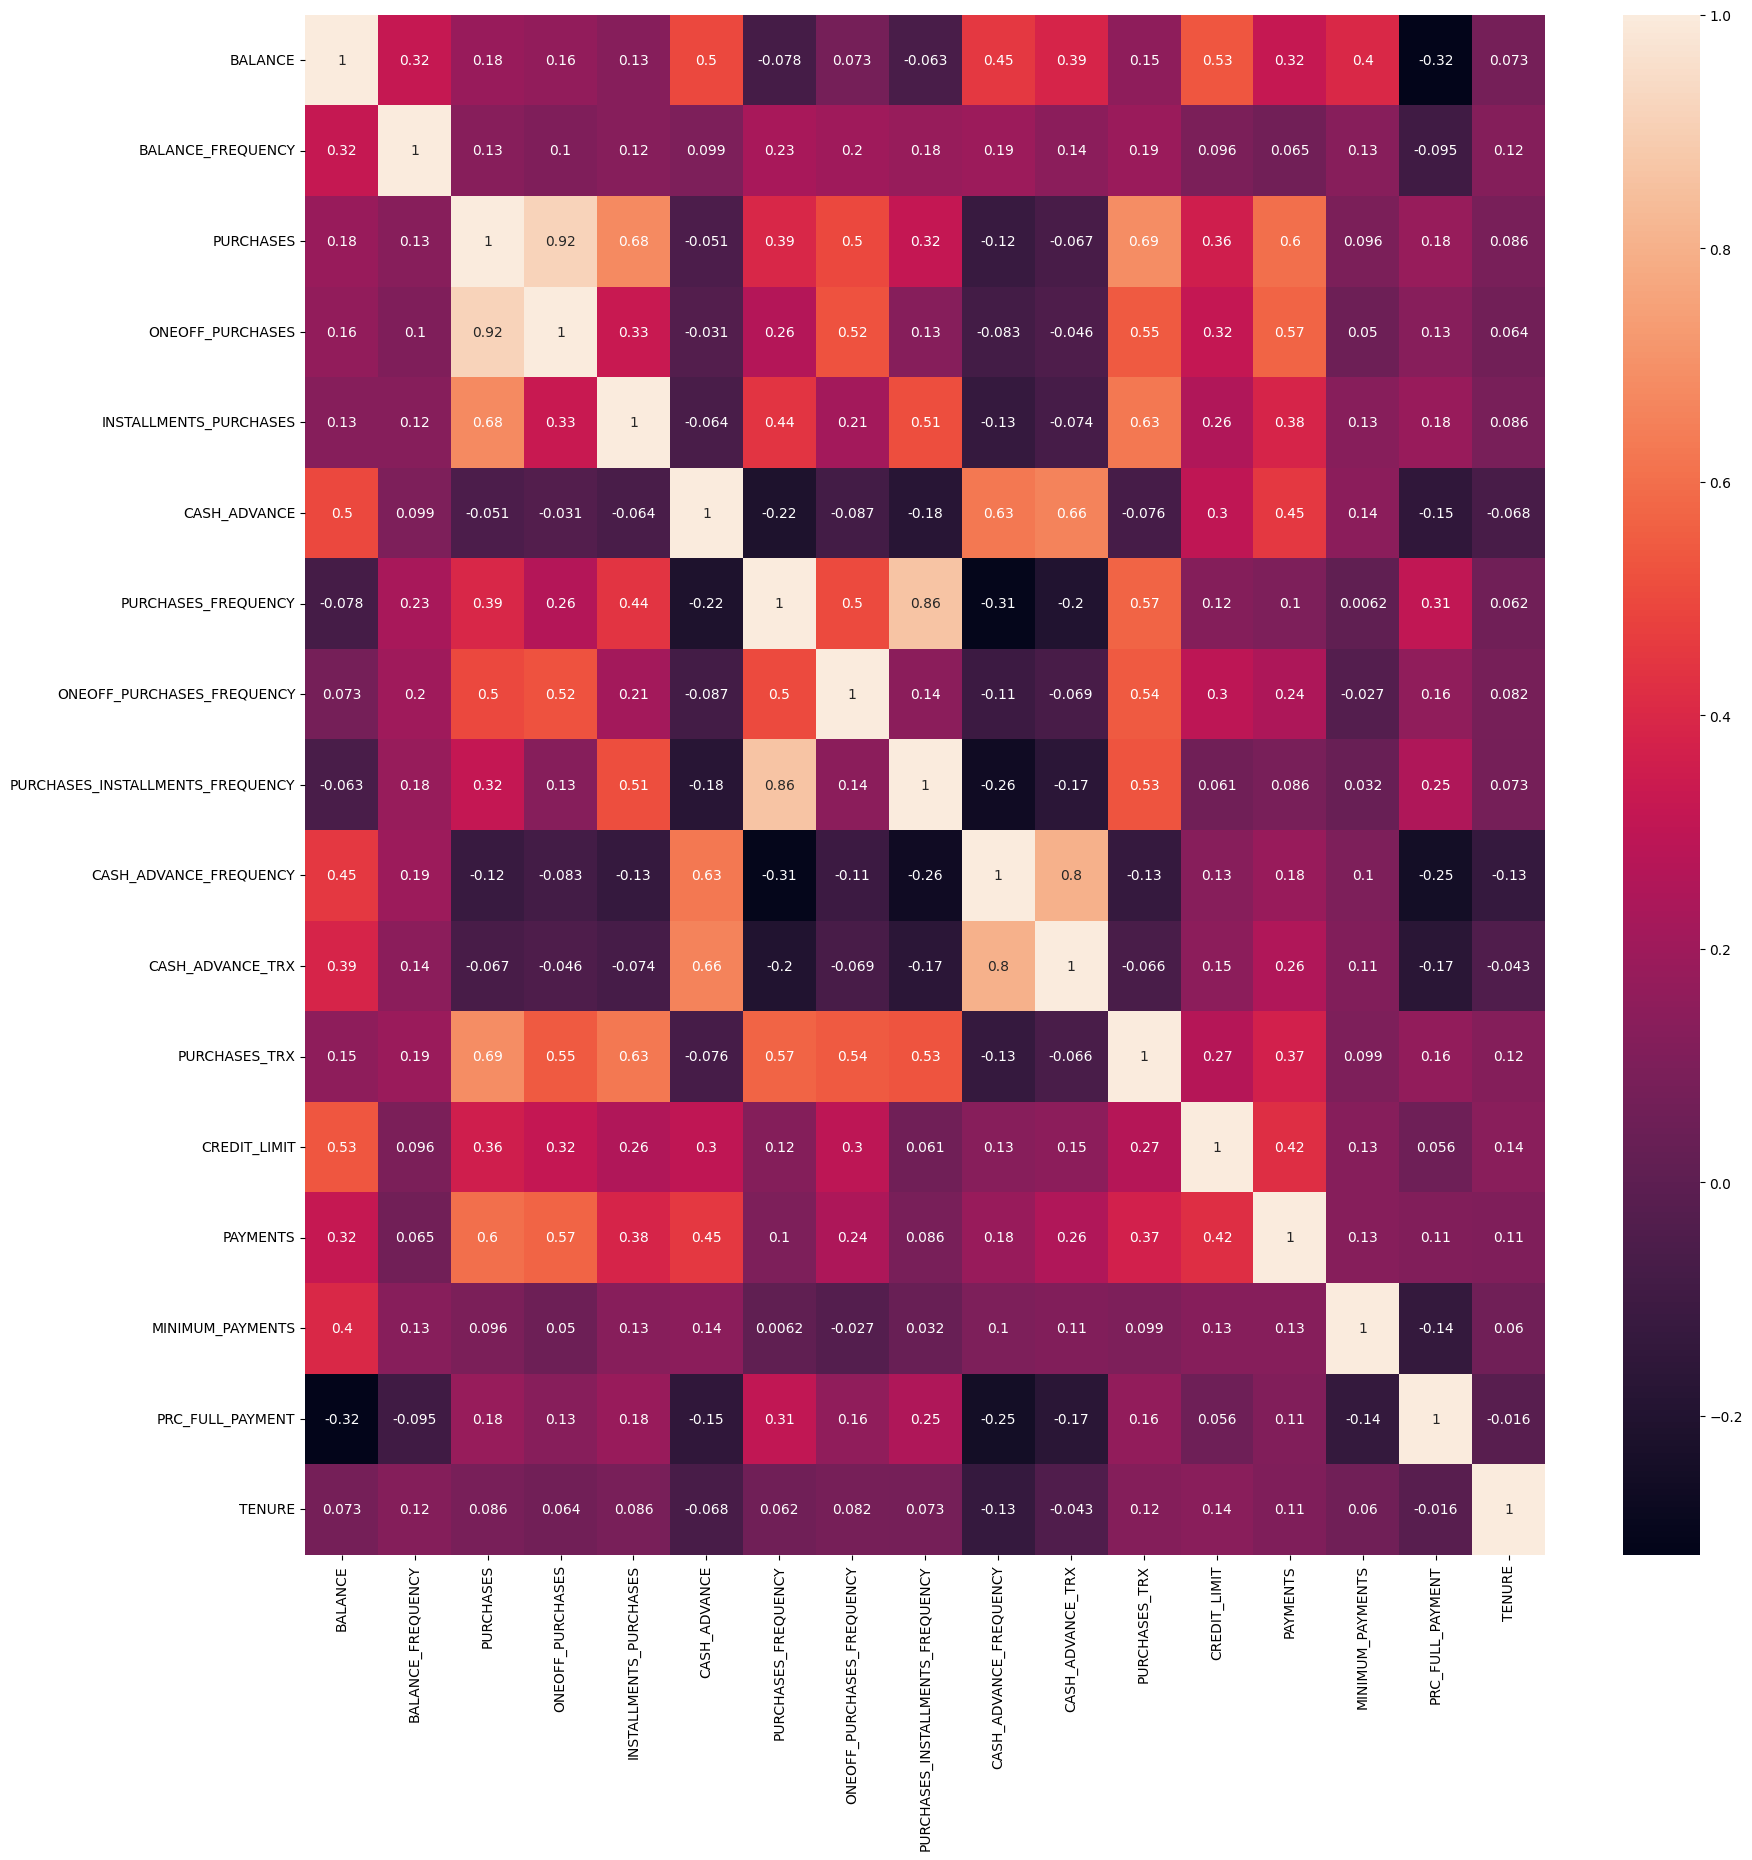

In [23]:
correlations = credit_cards.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [26]:
# Scale the data 
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(credit_cards)

In [28]:
cc_scaled.shape

(8950, 17)

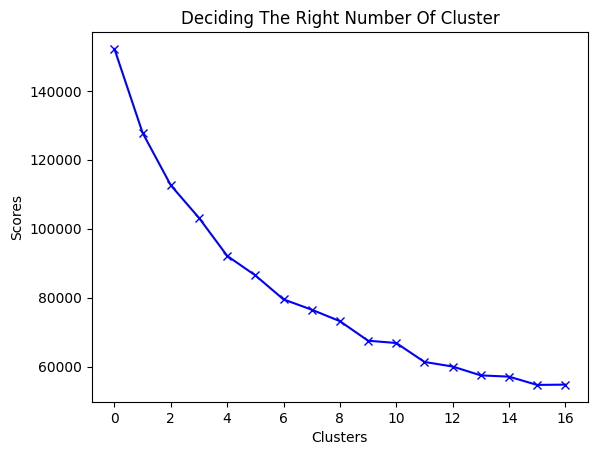

In [30]:
scores_1=[]
rangevalue=range(1,18)
for i in rangevalue:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(cc_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, "bx-")
plt.title("Deciding The Right Number Of Cluster")
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()
    

In [31]:
# Apply K-means algorithms
kmeans = KMeans(8)
kmeans.fit(cc_scaled)
labels = kmeans.labels_

In [32]:
kmeans.cluster_centers_.shape

(8, 17)

In [33]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_cards.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.164928,0.391845,0.453908,0.593981,-0.018141,-0.332523,0.943492,1.878868,0.088822,-0.406144,-0.322174,0.524320,0.373620,0.086654,-0.157336,0.406347,0.261047
1,0.017949,0.403224,-0.361687,-0.246881,-0.401527,-0.087876,-0.866328,-0.410213,-0.757631,0.112908,-0.023111,-0.486473,-0.305979,-0.248289,-0.005842,-0.456423,0.272284
2,1.698275,0.397350,-0.217548,-0.156378,-0.227164,2.020042,-0.475361,-0.213207,-0.412042,1.923316,1.942963,-0.265885,1.034035,0.810743,0.564871,-0.396606,0.070278
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044081,8.098975,1.127533,1.110132,0.310863
4,-0.364387,0.333522,-0.036963,-0.244149,0.360956,-0.363619,0.991355,-0.386657,1.206719,-0.475345,-0.361168,0.188172,-0.259097,-0.215973,-0.025829,0.314266,0.257586
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567769,-0.392680,-0.215888,0.014011,-3.203733
6,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175915,-0.192408,-0.284421,0.283762,0.199336
7,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238981,1.290295,0.448393,0.304778,0.334182


In [34]:
y_kmeans = kmeans.fit_predict(cc_scaled)
y_kmeans

array([1, 5, 2, ..., 3, 3, 3], shape=(8950,), dtype=int32)

In [37]:
# Concatenate the clusters labels to original dataframe
cc_cluster = pd.concat([credit_cards, pd.DataFrame({'CLUSTER':labels})], axis = 1)
cc_cluster.head()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


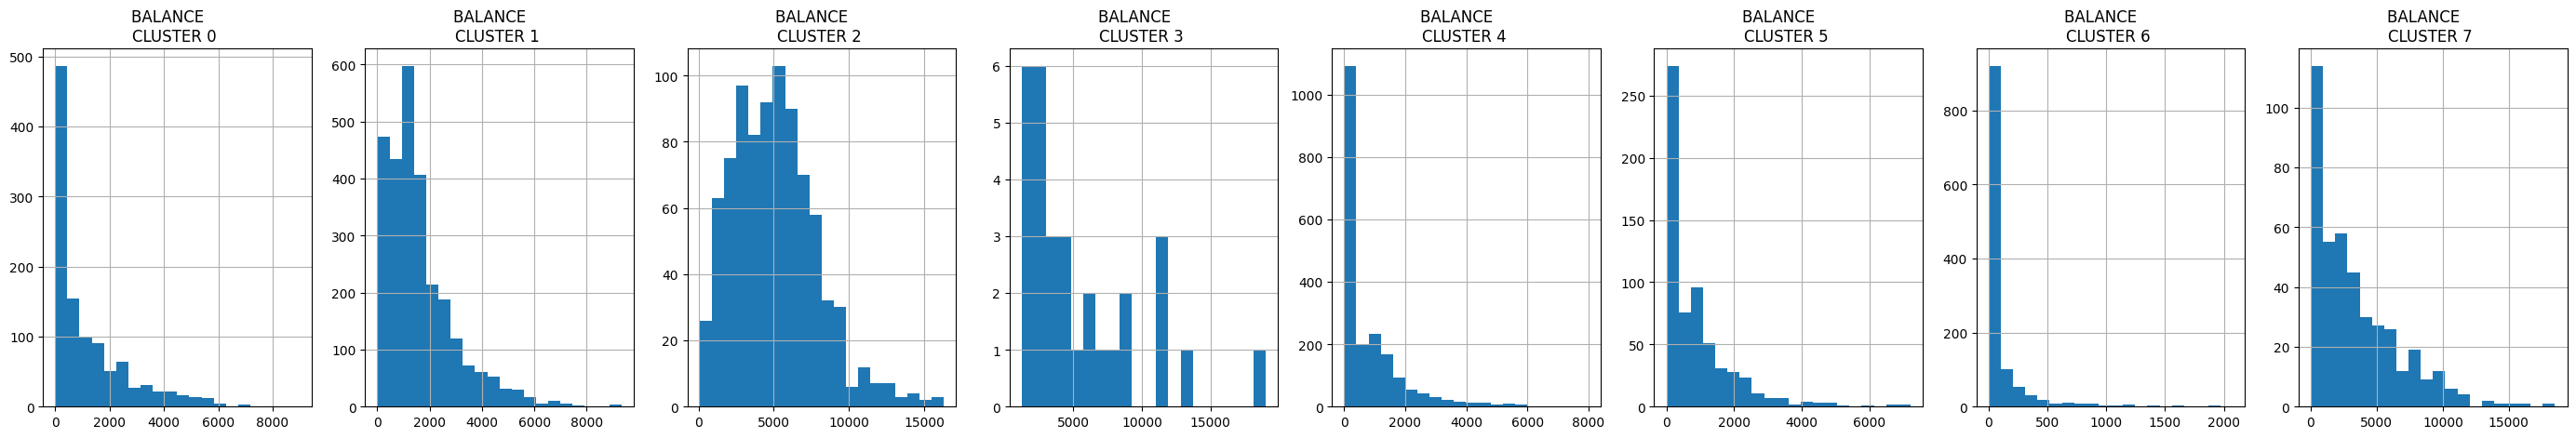

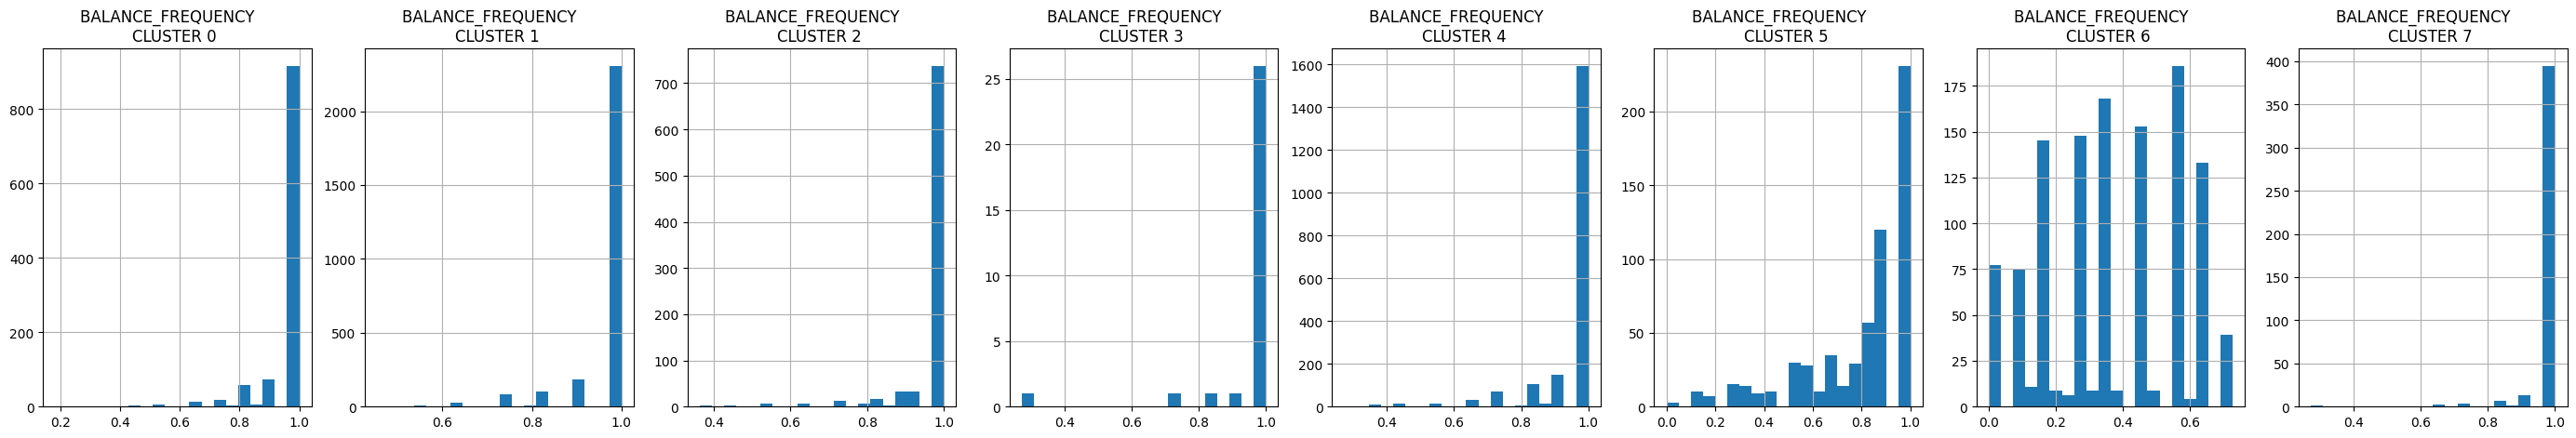

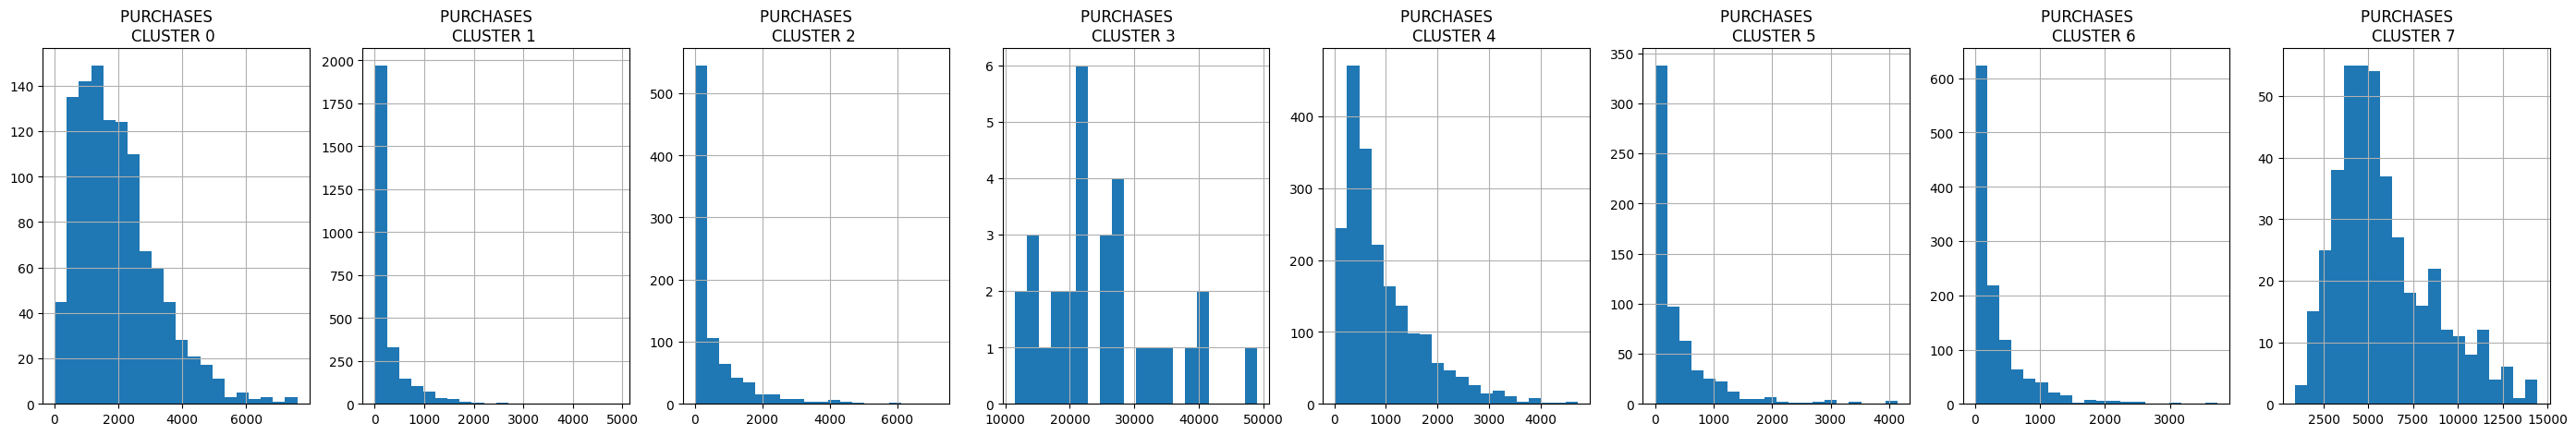

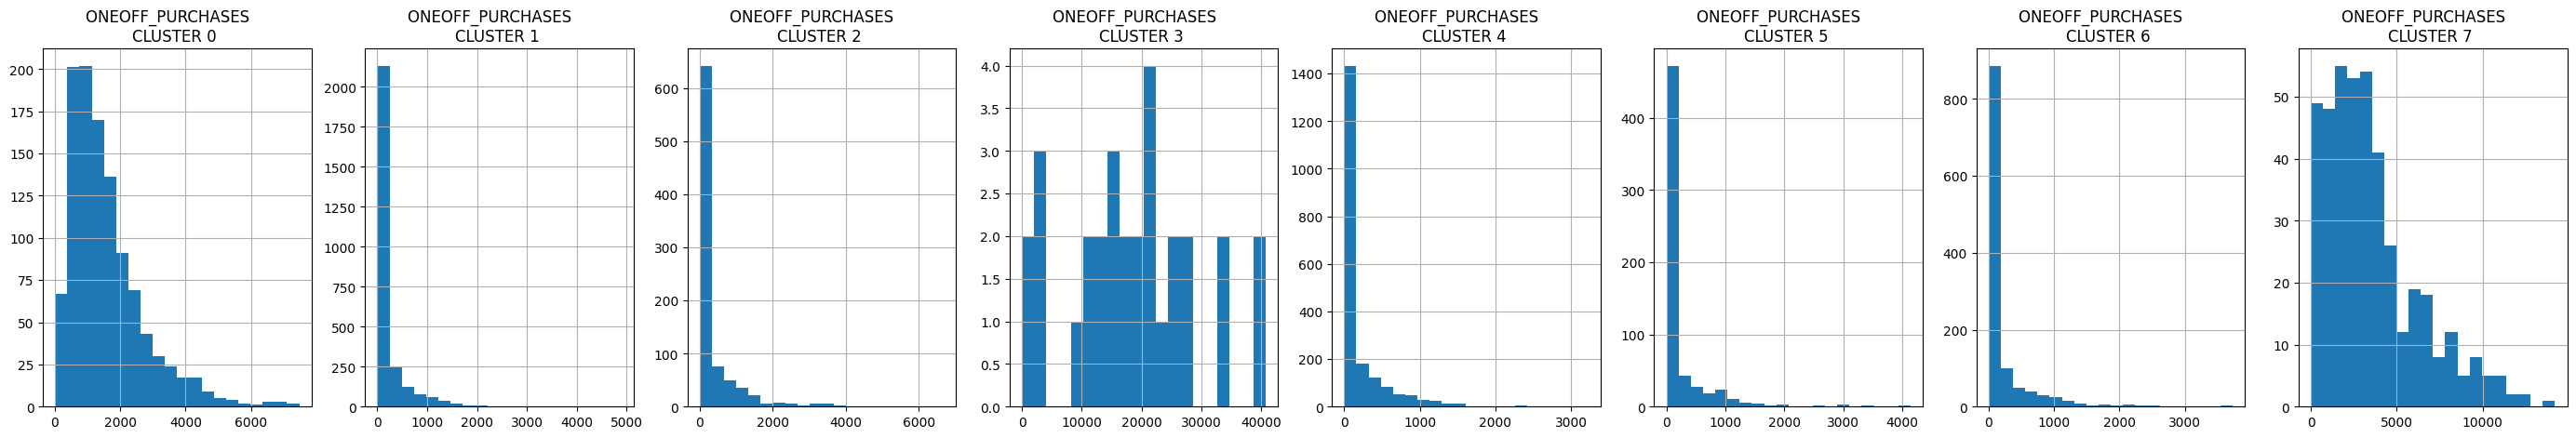

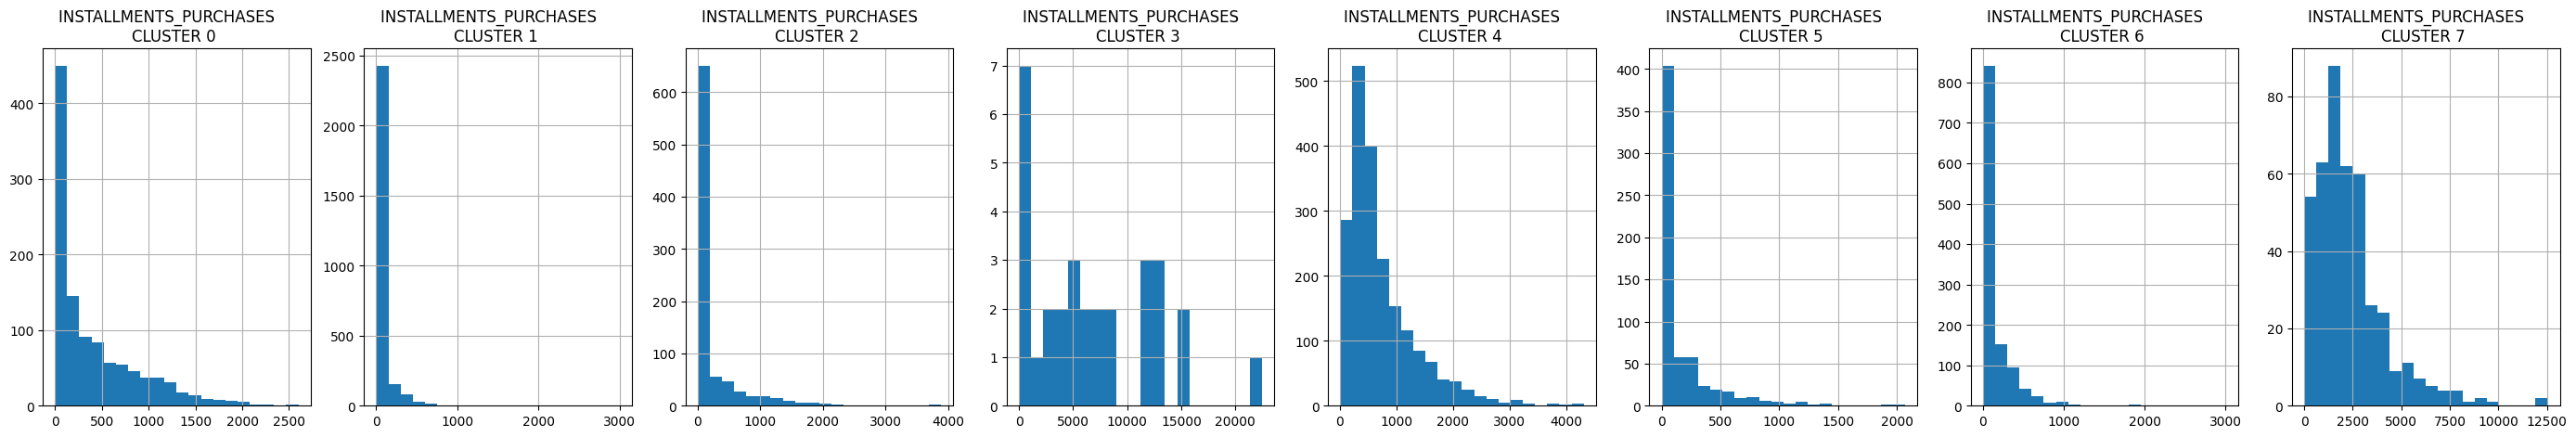

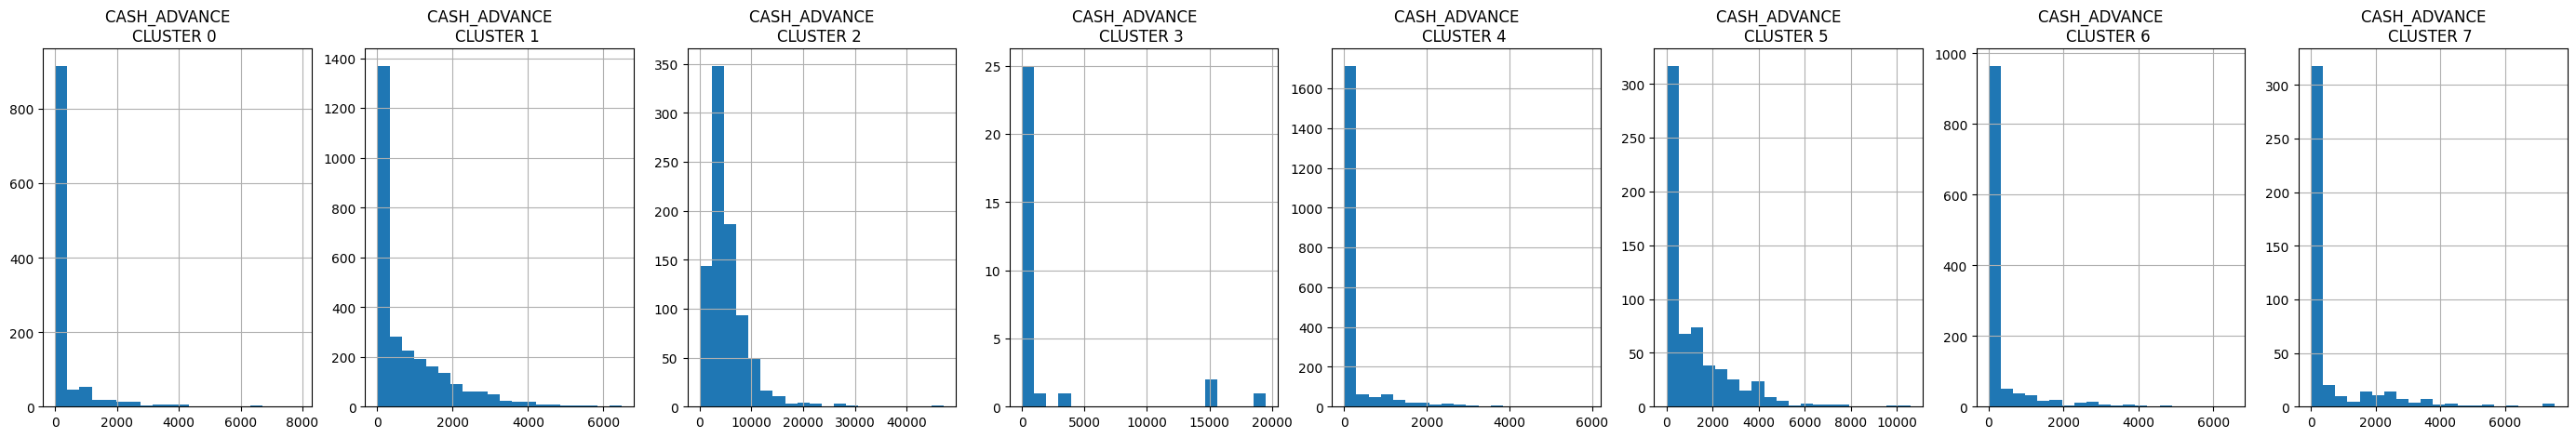

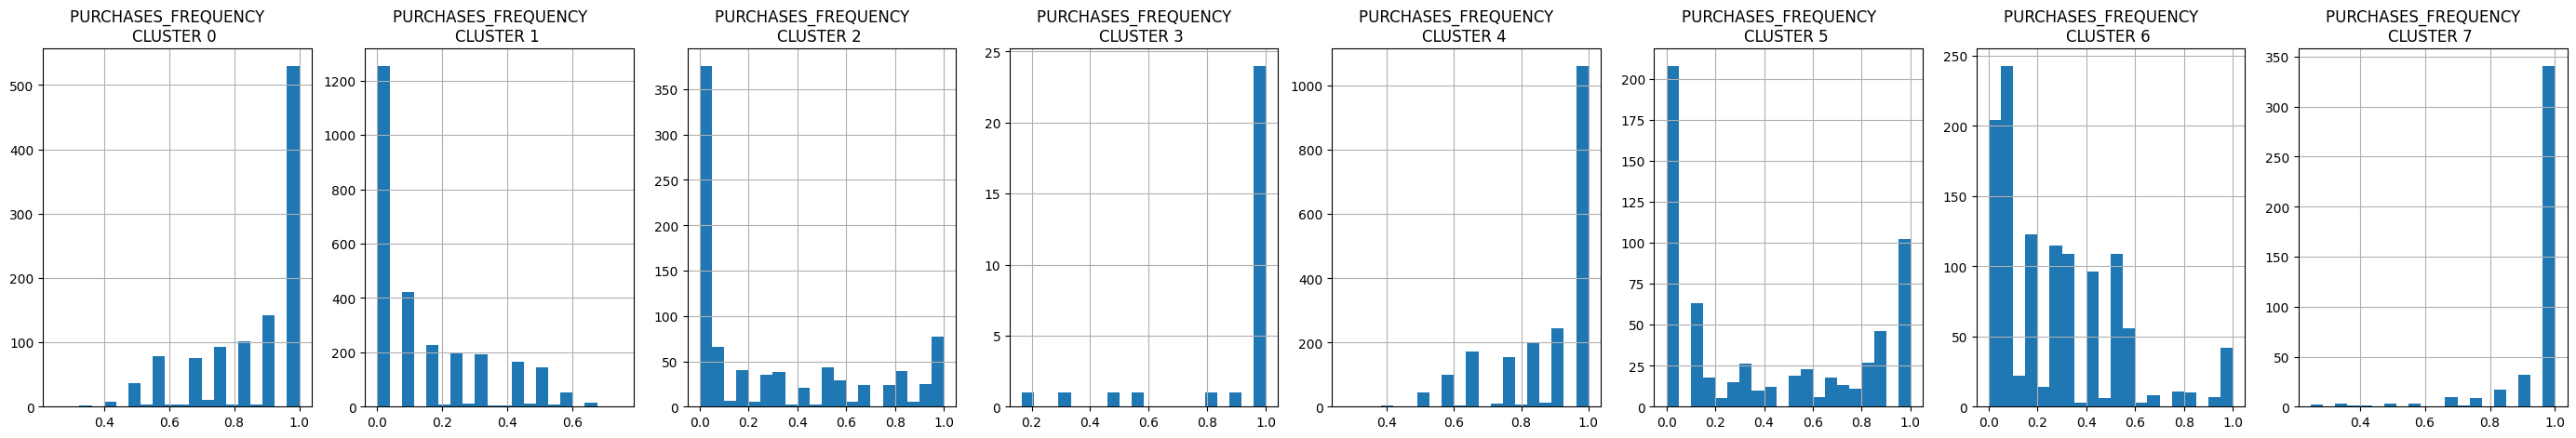

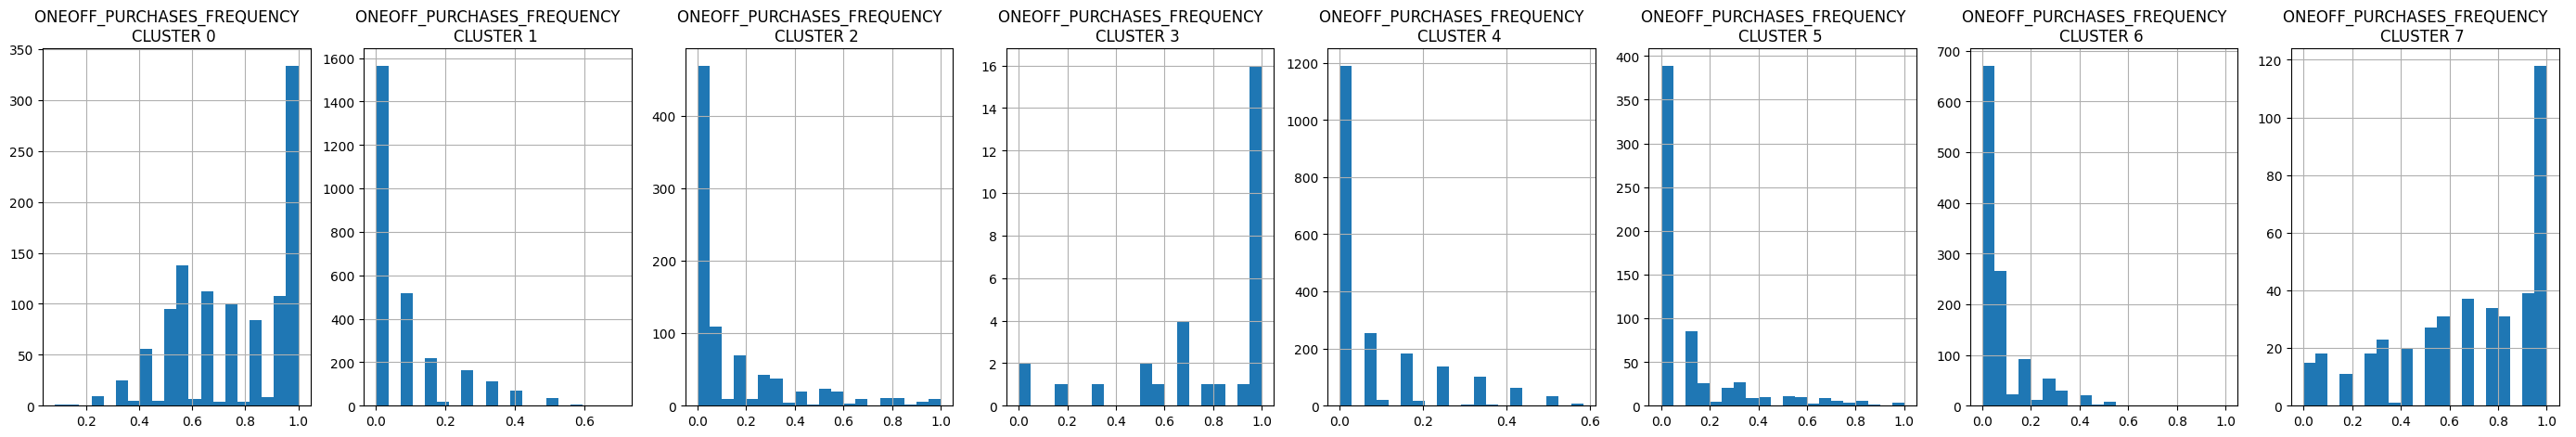

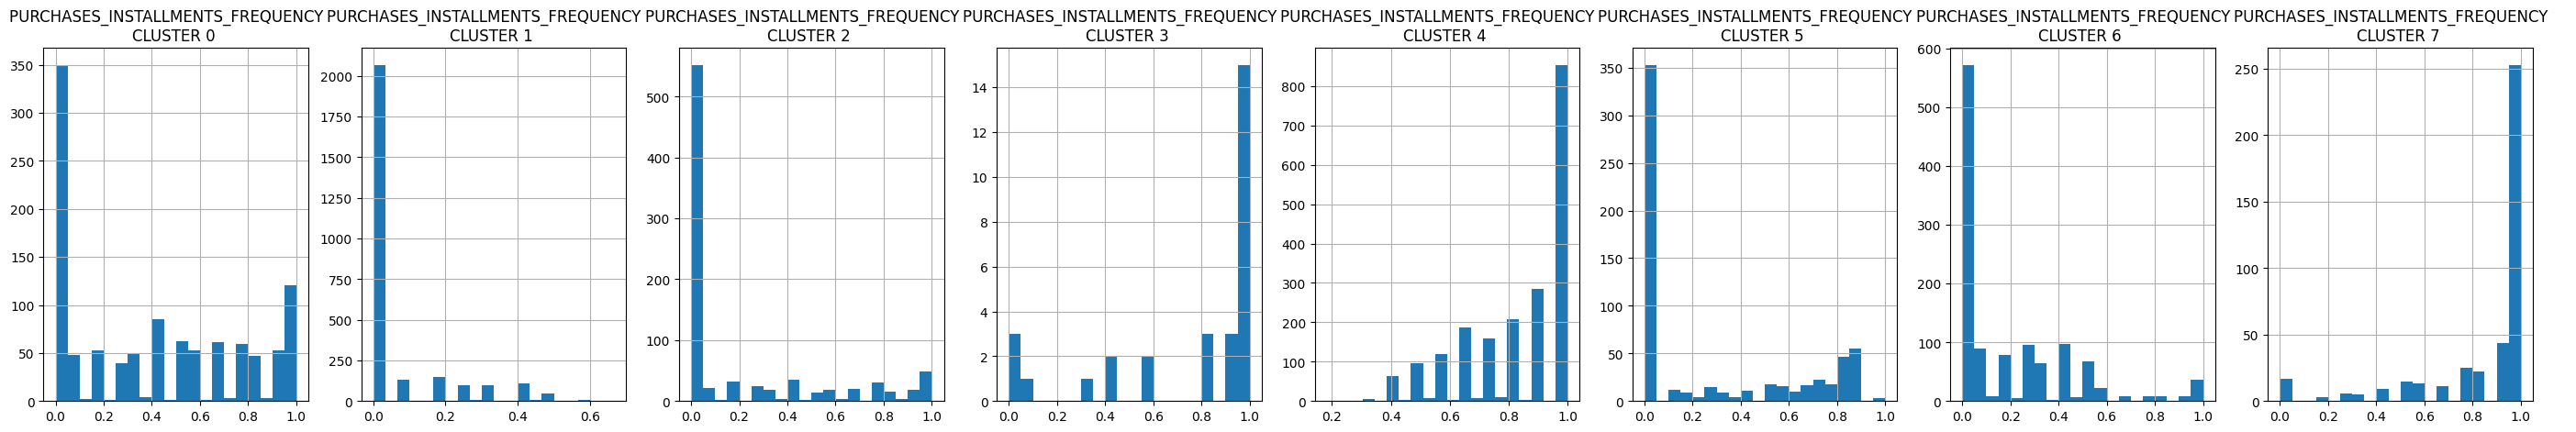

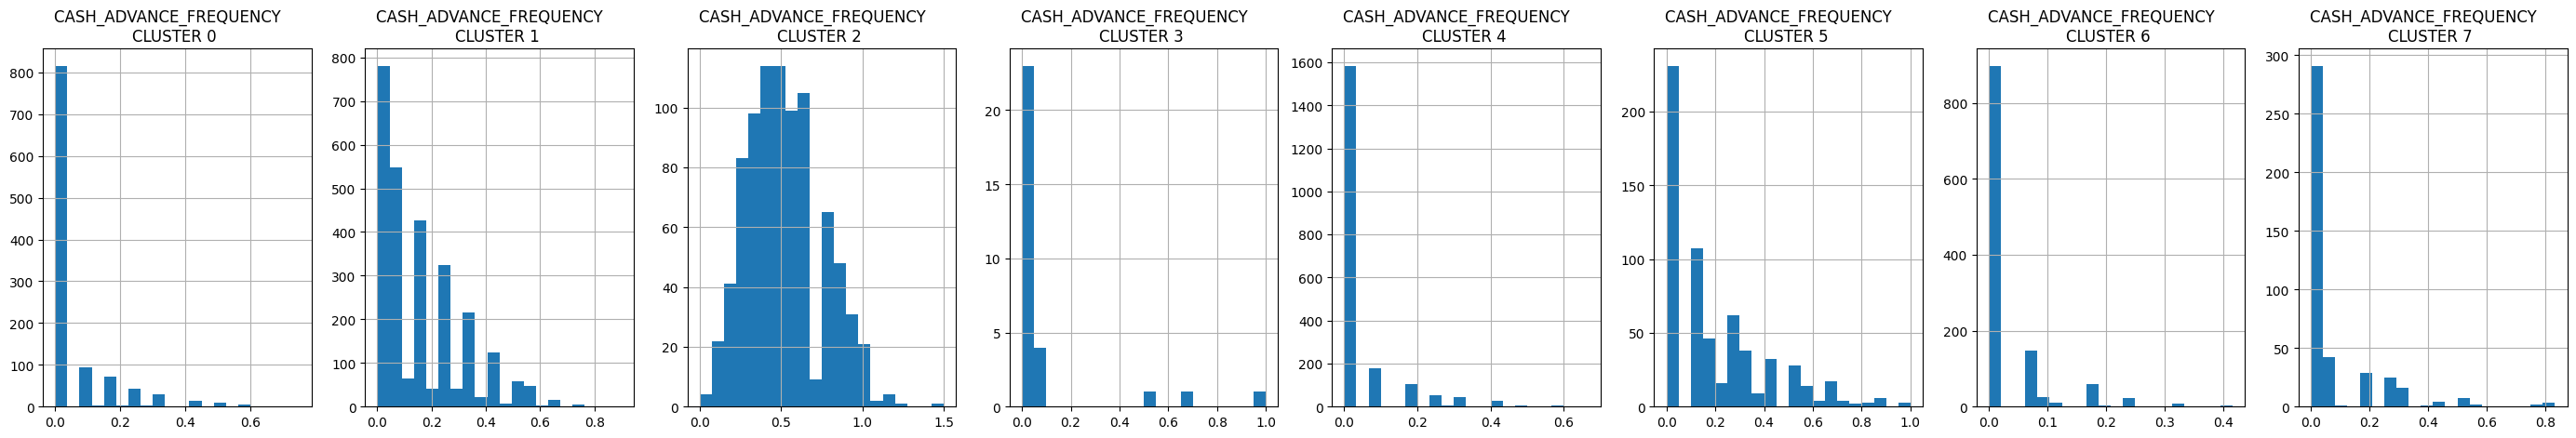

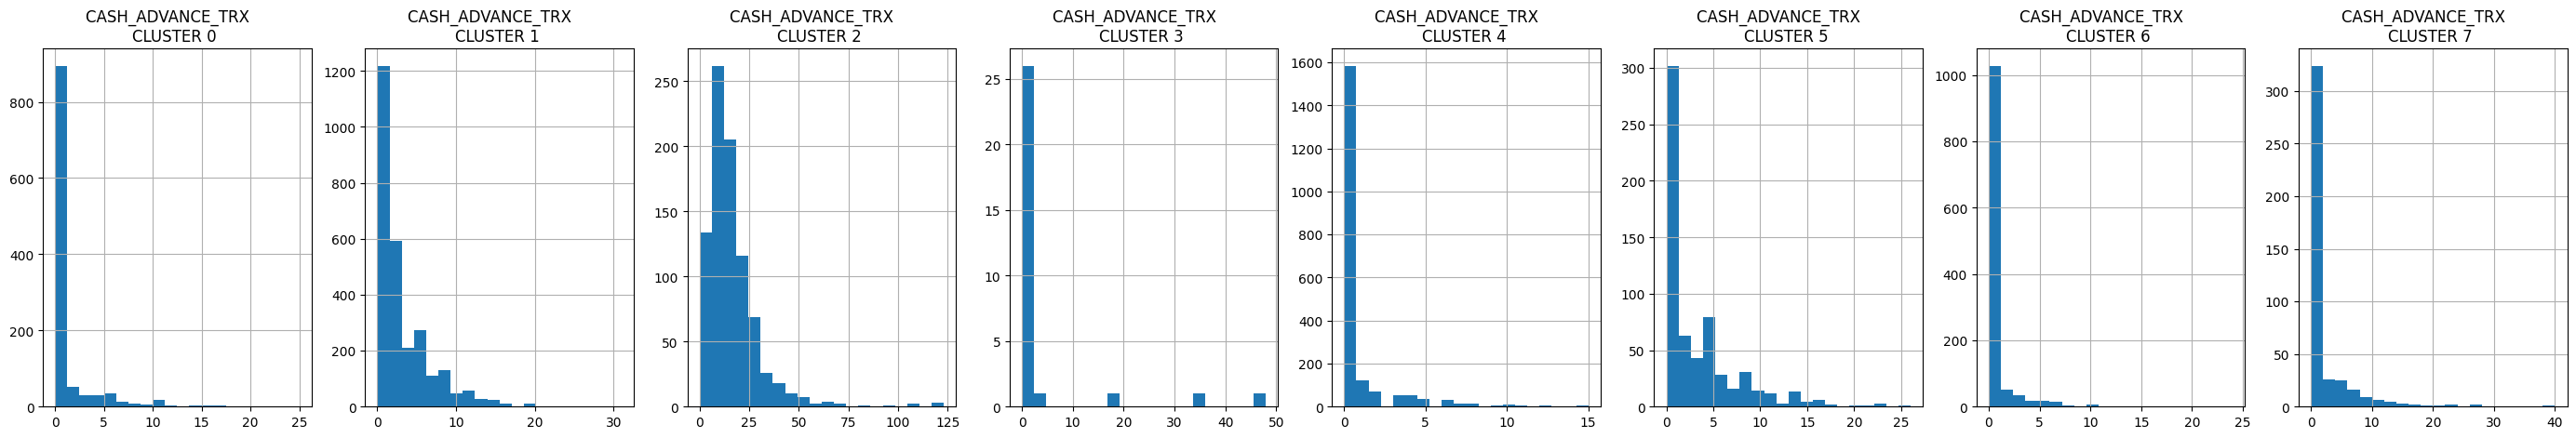

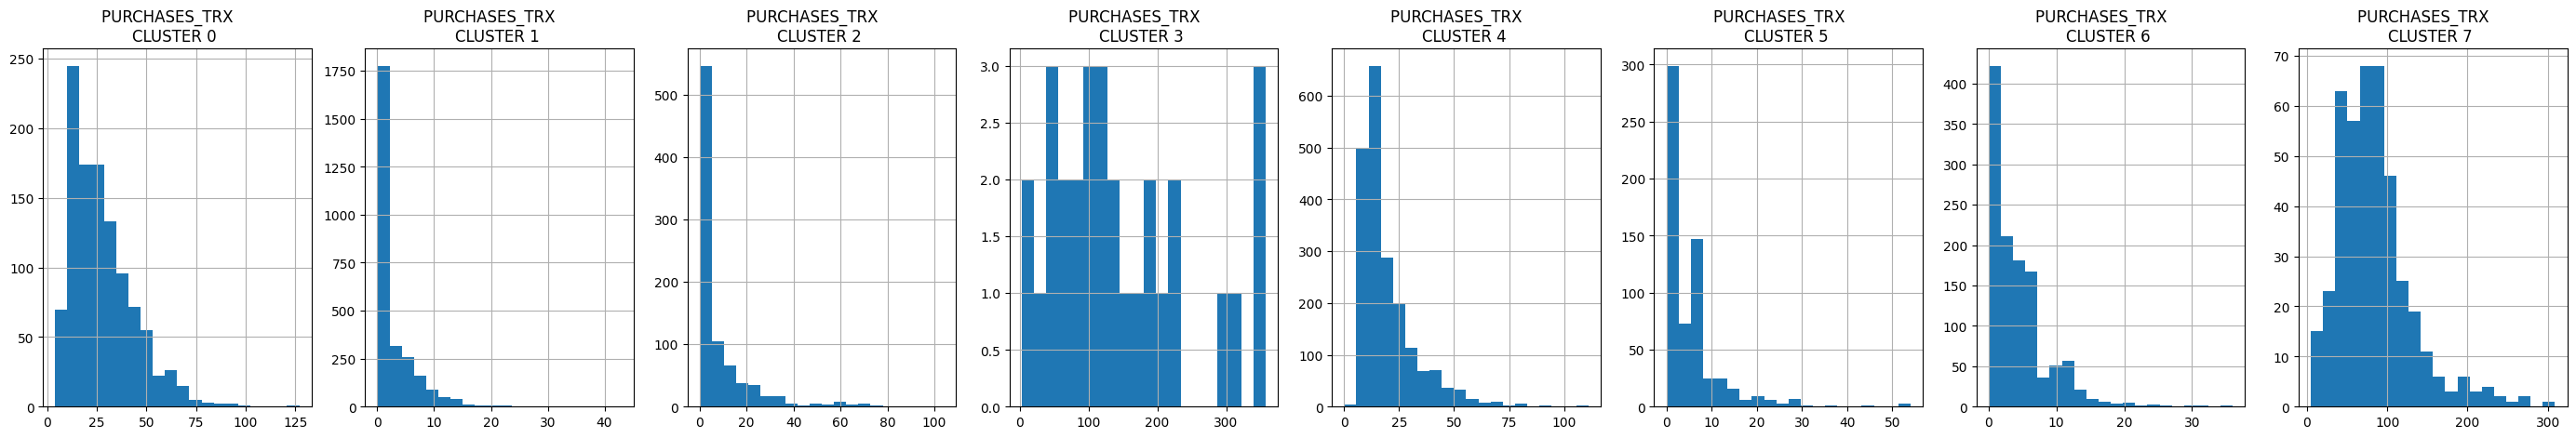

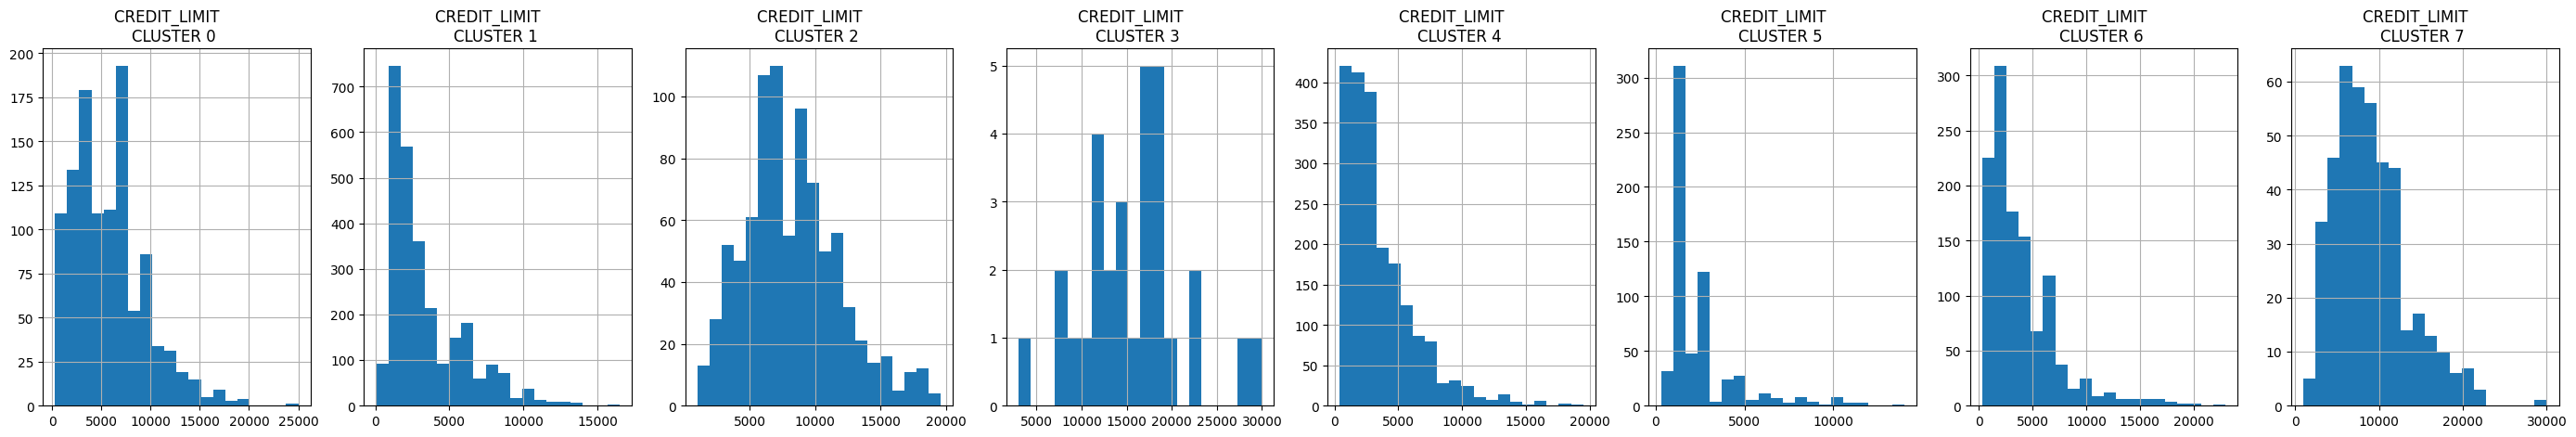

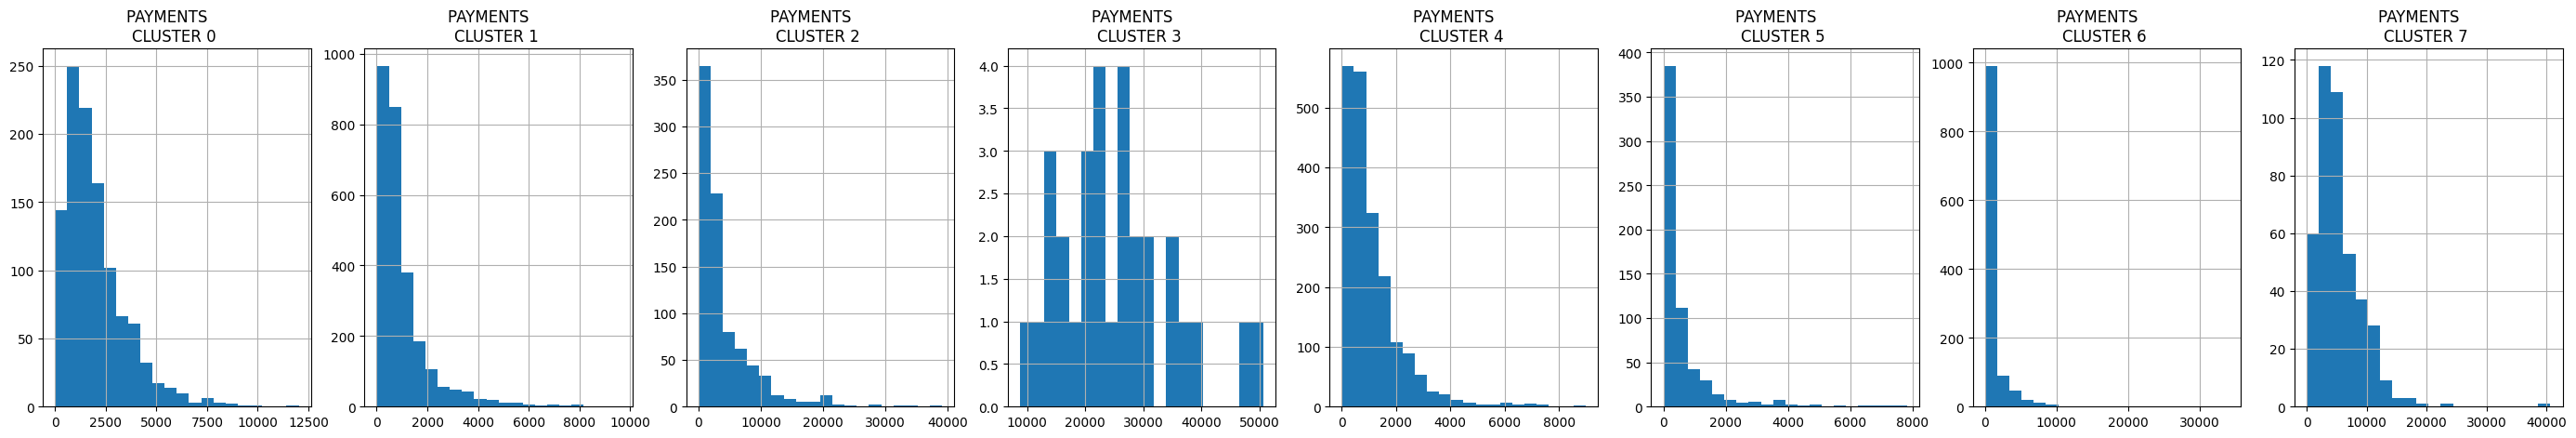

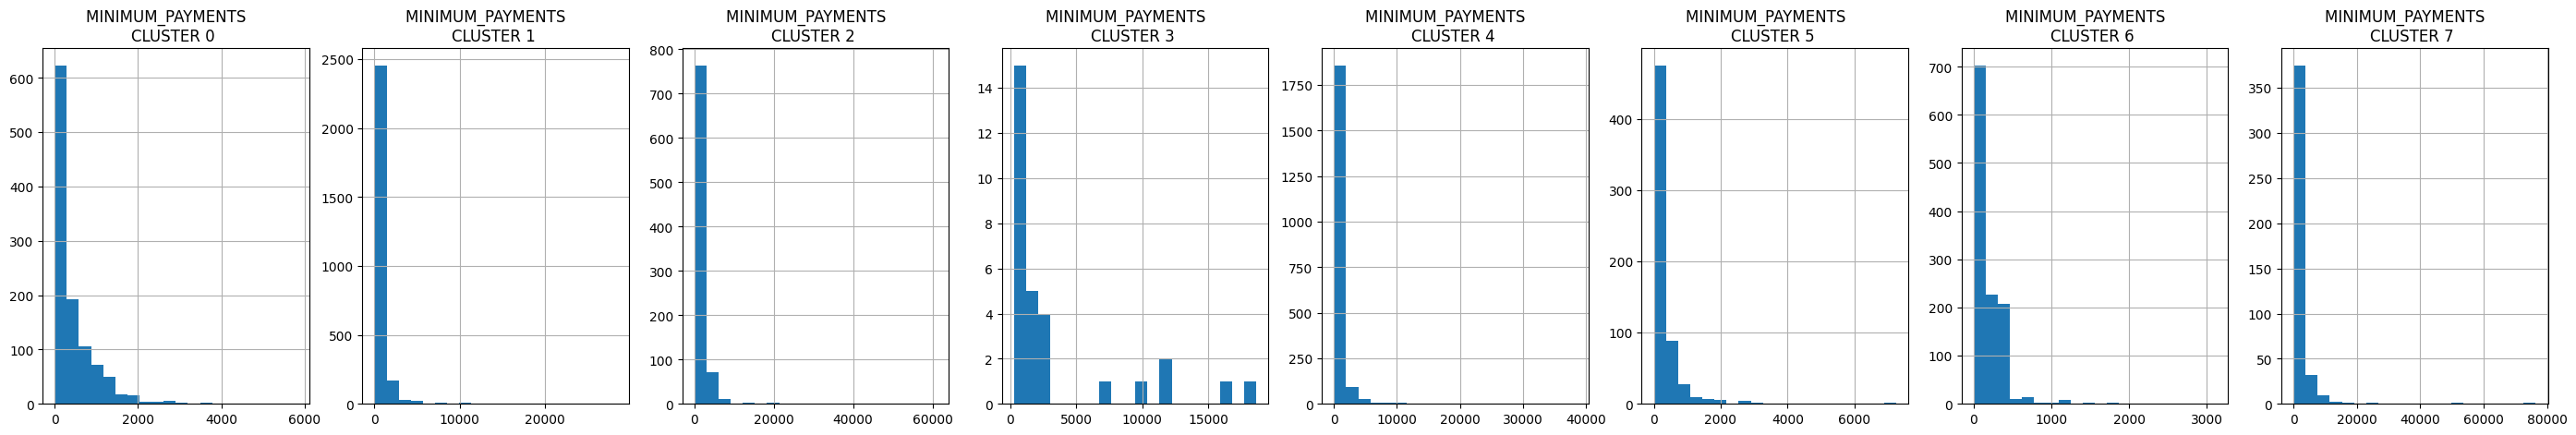

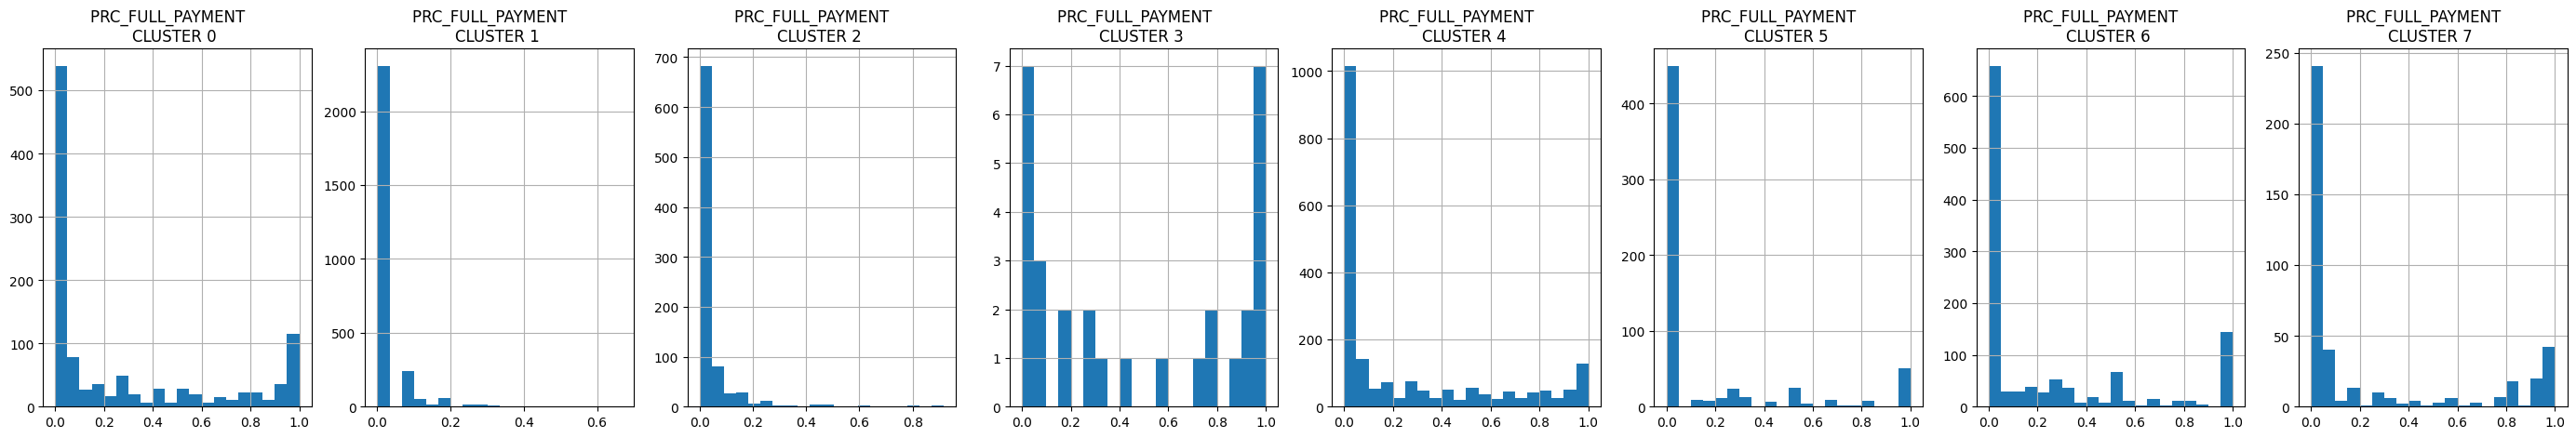

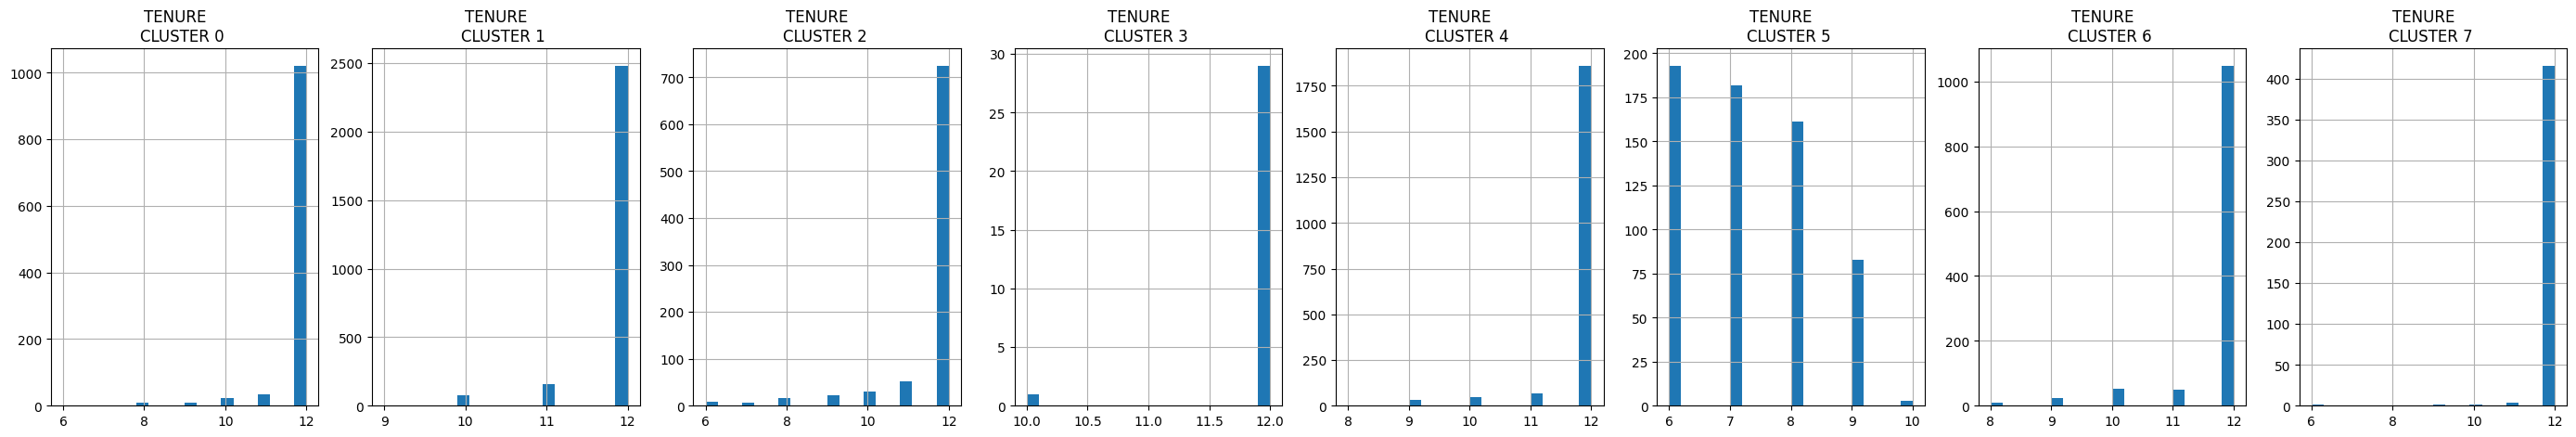

In [57]:
# Plot the histogram of various clusters
for i in credit_cards.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = cc_cluster[cc_cluster['CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCLUSTER {} '.format(i,j))
  
  plt.show()

In [58]:
# Principal component analysis
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(cc_scaled)
principal_comp

array([[-1.68364879, -1.07224148],
       [-1.13408493,  2.50914981],
       [ 0.96939499, -0.3835769 ],
       ...,
       [-0.92898512, -1.80804835],
       [-2.33784475, -0.65361133],
       [-0.55802653, -0.4006461 ]], shape=(8950, 2))

In [59]:
# create the dataframe:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.683649,-1.072241
1,-1.134085,2.509150
2,0.969395,-0.383577
3,-0.888220,0.004648
4,-1.600021,-0.683795


In [60]:
# add the cluster value:

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683649,-1.072241,1
1,-1.134085,2.509150,2
2,0.969395,-0.383577,0
3,-0.888220,0.004648,1
4,-1.600021,-0.683795,1


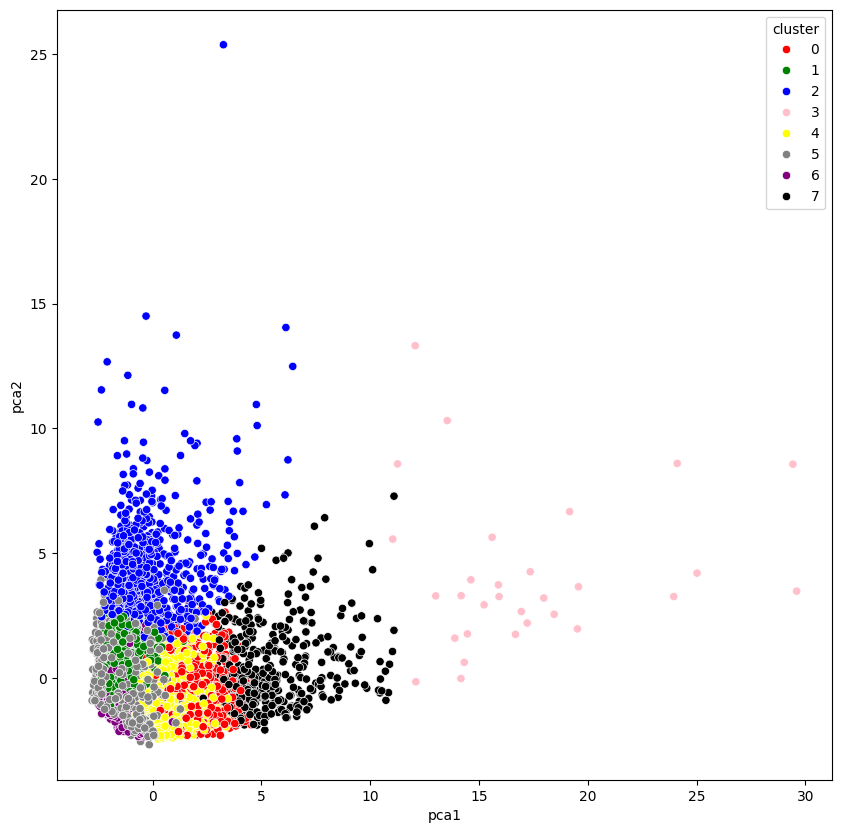

In [64]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df,palette=['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()



In [22]:
#create the initial cluster :

clustering_data=credit_cards[["BALANCE","PURCHASES","CREDIT_LIMIT"]]

for i in clustering_data.columns:
    MinMaxScaler(i)
    
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(clustering_data)
credit_cards["CREDIT_CARD_SEGEMENTS"]=clusters

In [23]:
print(clustering_data)

          BALANCE  PURCHASES  CREDIT_LIMIT
0       40.900749      95.40        1000.0
1     3202.467416       0.00        7000.0
2     2495.148862     773.17        7500.0
4      817.714335      16.00        1200.0
5     1809.828751    1333.28        1800.0
...           ...        ...           ...
8943     5.871712      20.90         500.0
8945    28.493517     291.12        1000.0
8947    23.398673     144.40        1000.0
8948    13.457564       0.00         500.0
8949   372.708075    1093.25        1200.0

[8636 rows x 3 columns]


In [24]:
X=clustering_data.values


def elbow_method(X,max_cluster):
    sse=[]
    for i in range(1,max_cluster+1):
        kmeans=KMeans(n_clusters=i,random_state=0).fit(X)
        sse.append(kmeans.inertia_)
            
    plt.plot(range(1, max_cluster+1),sse)
    plt.title("ELBOW METHODS")
    plt.xlabel("NUMBER OF CLUSTERS")
    plt.ylabel("SUM OF SQURED DISTANCES")
    plt.show()

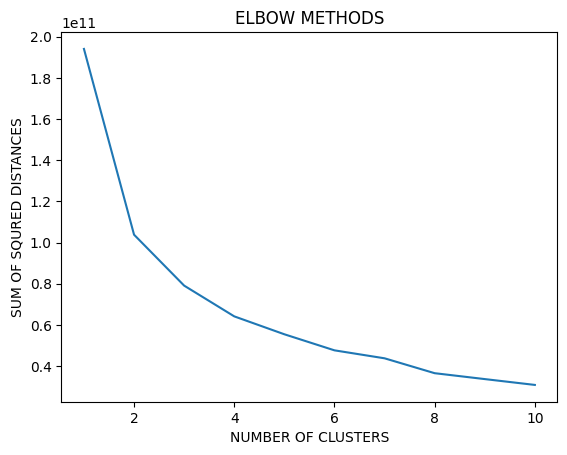

In [25]:
elbow_method(X,10)

In [26]:
clustering_data=credit_cards[["BALANCE","PURCHASES","CREDIT_LIMIT"]]

for i in clustering_data.columns:
    MinMaxScaler(i) 
    
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit_predict(clustering_data)
credit_cards["CREDIT_CARD_SEGEMENTS"]=clusters

In [27]:
credit_cards["CREDIT_CARD_SEGEMENTS"]=credit_cards["CREDIT_CARD_SEGEMENTS"].map({0:"cluster 1",1:"cluster 2",
                                                                                2:"cluster 3",3:"cluster 4"})

print(credit_cards["CREDIT_CARD_SEGEMENTS"].head(10))

0     cluster 2
1     cluster 4
2     cluster 4
4     cluster 2
5     cluster 2
6     cluster 3
7     cluster 2
8     cluster 4
9     cluster 4
10    cluster 2
Name: CREDIT_CARD_SEGEMENTS, dtype: object


In [28]:

PLOT = go.Figure()

for i in list(credit_cards["CREDIT_CARD_SEGEMENTS"].unique()):
    PLOT.add_trace(go.Scatter3d(
        x=credit_cards[credit_cards["CREDIT_CARD_SEGEMENTS"] == i]["BALANCE"],
        y=credit_cards[credit_cards["CREDIT_CARD_SEGEMENTS"] == i]["PURCHASES"],
        z=credit_cards[credit_cards["CREDIT_CARD_SEGEMENTS"] == i]["CREDIT_LIMIT"],
        mode="markers",
        marker=dict(size=6, line=dict(width=1)),  # Correct marker and line styling
        name=str(i)
    ))

# Update hover and layout
PLOT.update_traces(hovertemplate="BALANCE %{x} <br> PURCHASES %{y} <br> CREDIT_LIMIT %{z}")

PLOT.update_layout(
    width=800,
    height=800,
    autosize=True,
    showlegend=True,
    scene=dict(
        xaxis=dict(title="BALANCE", titlefont_color="black"),
        yaxis=dict(title="PURCHASES", titlefont_color="black"),
        zaxis=dict(title="CREDIT_LIMIT", titlefont_color="black")
    ),
    font=dict(family="Gilroy", color="black", size=12)
)




In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=credit_cards['CREDIT_LIMIT'], y=credit_cards['PAYMENTS'], hue=credit_cards['CREDIT_CARD_SEGEMENTS'], palette='viridis')
plt.title("Customer Segmentation Based on Spending & Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Annual Spend")
plt.legend()
plt.show()

In [35]:
credit_cards.to_csv("Segmented_Customers.csv",index=False)

In [ ]:
credit_cards